# <font color=pink>Prediccion de juegos</font>

Un club del juego de Go recopiló los resultados de varias partidas entre diferentes jugadores, almacenados
en el archivo ___juegos_entrenamiento.txt___, con el objetivo de predecir el resultado de
partidas futuras, ejemplos de las cuales se encuentran en el archivo ___juegos_validacion.txt___. Los archivos ___juegos_entrenamiento.txt___ y ___juegos_validacion.txt___ contienen 3 columnas: la primera
corresponde al identificador del jugador A, la segunda al identificador del jugador B y la tercera
es el resultado de la partida (1 si ganó el jugador A o 0 si ganó el jugador B). En el club hay un
total de D jugadores, por lo que cada identificador es un número entero entre 1 y D. La predicción
del resultado de un juego se puede plantear como un problema de clasificación: dados 2 jugadores
(A y B) se requiere predecir si A ganó $(y = 1)$ o si fue B $(y = 0)$. Realice los siguientes ejercicios:

* Entrena y evalúa un clasificador bayesiano ingenuo. Al ser un modelo generativo (modela la probabilidad conjunta $P(x;y)$), es posible generar partidas artificiales con los parámetros calculados. Genera nuevas partidas que sigan la distribución modelada.

In [1]:
#Importamos librerias utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
import math as m

#Leemos nuestros datos
train = pd.read_csv('juegos_entrenamiento.txt',header=None,sep='\s+')
validacion = pd.read_csv('juegos_validacion.txt',header=None,sep='\s+')

#Renombramos las columnas de los datos por claridad
train.columns=['ID A','ID B','Resultado']
validacion.columns=['ID A','ID B','Resultado']
#mostramos uno de las bases de datos
validacion

,ID A,ID B,Resultado
0,35,43,1
1,45,9,0
2,55,106,0
3,35,43,1
4,35,43,1
...,...,...,...
110,60,120,1
111,101,43,1
112,55,105,0
113,7,9,0


In [2]:
#Veamos que las bases de datos no vengan incompletas
validacion.info()
train.info()
#dado que las tres columnas de las dos db son non-null y de tipo int64, entonces decimos que no estan incompletas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID A       115 non-null    int64
 1   ID B       115 non-null    int64
 2   Resultado  115 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID A       319 non-null    int64
 1   ID B       319 non-null    int64
 2   Resultado  319 non-null    int64
dtypes: int64(3)
memory usage: 7.6 KB


In [3]:
#creamos nuestros arrays de x e y para train y validacion
xTrain = (train.drop(columns=['Resultado'])).to_numpy()
yTrain = (train['Resultado']).to_numpy()
xValid = (validacion.drop(columns=['Resultado'])).to_numpy()
yValid = (validacion['Resultado']).to_numpy()

In [4]:
naiveCat = CategoricalNB(alpha=20)
naiveCat.fit(xTrain,yTrain)
prediccion = naiveCat.predict(xValid)

#usamos la funcion accuracy_score entre las variables prediccion e yValid
#tal y como fueron definidos. Esta funcion muestra el porcentaje de clasificaciones buenas
#que hace el modelo con respecto a todas las muestras
print(accuracy_score(prediccion,yValid))

0.7304347826086957


Ya que tenemos nuestro Bayes entrenado y con un accuracy decente (73%) lo que vamos a hacer es buscar el maximo y el minimo del ID, para con un generador de nuemeros aleatorios crear partidas aleatorias, es decir generar datos de forma aleatoria un nuevo array de dos columnas que contengan los ID de tal forma que los ID de ambas columnas sean diferentes. Posteriormente a este nuevo array vamos a pasarle un predict de nuestro modelo ya entrenado, que generara los resultados artificiales y con esto terminaremos la tarea de generar datos artificiales para partidas artificiales 

In [5]:
#Obtenemos los valores maximo y minimo de los ID
maxTrain = train.max()
maxValid = validacion.max()
print(maxTrain)
print(maxValid)
#El ID maximo es 142
minTrain = train.min()
minValid = validacion.min()
print(minTrain)
print(minValid)
#El ID minimo es 1

ID A         142
ID B         141
Resultado      1
dtype: int64
ID A         132
ID B         136
Resultado      1
dtype: int64
ID A         1
ID B         1
Resultado    0
dtype: int64
ID A         4
ID B         4
Resultado    0
dtype: int64


In [6]:
#Generaremos 150 partidas artificiales. para ello creamos un array numpy de ceros de 150filasx2columnas
artificiales = np.zeros((150,2),dtype=int)
#rellenamos los valores de los jugadores A,B con un ciclo for y un generador de numeros pseudo aleatorios
for i in range(artificiales.shape[0]):
    #metemos i semillas para obtener reproducibilidad
    np.random.seed(i)
    #creamos dos numeros enteros aleatorios entre [0,143),  y los asignamos a la variable jugador
    jugadorA = np.random.randint(1,143)
    jugadorB = np.random.randint(1,142)
    #si ambos valores son diferentes
    if jugadorA != jugadorB:
        #asigna a la fila i columna 0 el id del jugador A
        artificiales[i][0] = jugadorA
        #asigna a la fila i columna 1 el id del jugador B
        artificiales[i][1] = jugadorB
    #Si ambos ID son iguales, esto no es posible porque un jugador no puede jugar contra el mismo
    else:
        #escribe 0 en ambas columnas, esto nos servira para buscar posibles juegos que no son factibles y poder cambiarlos
        artificiales[i][0] = 0
        artificiales[i][1] = 0

In [7]:
#Buscamos en el array todos aquellos indices que contienen 0,0
partidasInvalid = np.where(artificiales==0)
#la salida nos dice que en la fila 82 tenemos unicamente una partida invalida en el array artificiales
partidasInvalid

(array([82, 82], dtype=int64), array([0, 1], dtype=int64))

In [8]:
#asignamos manualmente una partida valida
artificiales[82][0] = 25
artificiales[82][1] = 114
#comprobamos que realmente no hay otras partidas invalidas con la misma instruccion anterior
#Buscamos en el array todos aquellos indices que contienen 0,0
partidasInvalid = np.where(artificiales==0)
#la salida nos dice que en la fila 82 tenemos unicamente una partida invalida en el array artificiales
partidasInvalid

(array([], dtype=int64), array([], dtype=int64))

In [9]:
#Usamos nuestro Naive entrenado para generar los resultados de las partidas artificiales
resultadoArtificiales = naiveCat.predict(artificiales)

In [10]:
#creamos un nuevo dataFrame con las columnas ID A e ID B a partir de los datos 'artificiales'
juegosArtificiales = pd.DataFrame(data=artificiales, columns=['ID A', 'ID B'])
#le pegamos la columna de la prediccion del modelo
juegosArtificiales['Resultado'] = resultadoArtificiales
#mostramos nuestro nuevo dataframe
juegosArtificiales

,ID A,ID B,Resultado
0,48,118,1
1,38,141,1
2,16,73,1
3,107,132,1
4,123,130,0
...,...,...,...
145,38,107,1
146,99,29,1
147,24,31,1
148,84,20,1


* Entrena y evalúa un clasificador de regresión logística (a mano). Para esto es necesario reparametrizar las entradas. Explica el procedimiento y la lógica de la reparametrización que realizaste. Selecciona y visualiza los valores de los parámetros.Grafica las curvas ROC y de precisión-exhaustividad y reporta sus áreas bajo la curva.

In [11]:
#Creamos un nuevo dataframe a partir de los dato entrenamiento que llamaremos prueba
#este nuevo df vendra ordenado por los valores de la columna ID A e IDB, ojo este ordenamiento
#no cambia los valores de cada columna y cada fila del df original todo esto se hace para comprobacion visual
prueba = train.sort_values(by=['ID A', 'ID B'])
#reseteamos los indices del nuevo df, pandas agregara una nueva columna index que contendra el valor de la
#fila original en el df train, de nuevo esto se hace como comprobacion visual para ver que el sort no arruino
#los datos originales
prueba = prueba.reset_index()
#guardamos el nuevo df a un documento prueba.csv para hacer inspeccion visual
#esta inspeccion no es tan necesaria, pero para mi tranquilidad lo hice
prueba.to_csv(r'prueba.csv', index = False)

In [12]:
#convertimos el df nuevo a un array numpy
matrizPrueba = prueba.to_numpy()
#creamos un nuevo array que contendra las estadisticas de los jugadores la primera columna sera el Id del jugador
#La segunda tendra la cantidad de juegos jugados, la tercera la cantidad de juegos ganados y la cuarta contendra
#la el winrate del jugador. el winrate lo definimos como juegos ganados/juegos jugados, el maximo es 1, y corresponde
#a un jugador que gano todas las partidas, mientras que el minimo es cero y corresponde al jugador que perdio todas.
estadistica = np.zeros((143,4), dtype=float)
#definimos una variable auxiliar que nos ayudara a contar los juegos ganados de cada jugador
auxiliar = 0
#mostramos la matriz de prueba
matrizPrueba

array([[127,   1,  50,   1],
       [297,   1, 118,   1],
       [298,   1, 118,   1],
       ...,
       [255, 142,  19,   1],
       [ 86, 142, 118,   1],
       [ 92, 142, 138,   1]], dtype=int64)

In [13]:
#dado que no es necesario el ordenamiento, reseteamos la variable prueba a los valores originales de train
prueba = train
#convertimos este df a una matriz
matrizPrueba = prueba.to_numpy()
#cambiamos el tipo de la matriz a float ya que vamos a cambiar el ID por el winrate de cada jugador
matrizPrueba = matrizPrueba.astype(float)
#mostramos el df prueba
prueba

,ID A,ID B,Resultado
0,3,4,1
1,7,8,1
2,40,10,1
3,16,17,1
4,8,18,1
...,...,...,...
314,80,97,1
315,81,45,0
316,35,43,1
317,87,23,0


In [14]:
#lo mismo debe hacerse para los datos de validacion por lo que creamos un df prueba1 que contiene los valores de 
#validacion
prueba1 = validacion
#convertimos a una matriz
matrizPrueba1 = prueba1.to_numpy()
#cambiamos a float
matrizPrueba1 = matrizPrueba1.astype(float)

In [15]:
#para i que va desde el ID 1 hasta el 142 de paso 1
for i in range (1,143,1):
    #guarda en la variable a (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo
    a = np.where(xTrain ==i)
    #guarda en la fila i columna cero de la matriz estadistica el valor (ID del jugador) i , es decir almacena el ID
    estadistica[i][0] = i
    #guarda en la fila i columna 1 de la matriz estadistica el valor de los juegos jugados por el jugador i, en su
    #respectiva fila
    estadistica[i][1] = a[0].shape[0]
    #itera sobre los juegos jugados por el jugador i 
    for x in range(a[0].shape[0]):
        #Si el resultado del juego en la posicion a[0][x] (filas de train) es igual a la posicion de la columna a[i][x]
        #es decir si el jugador i gano el encuentro, por ejemplo suongamos que para una fila dada tenemos que A: 5 B:125
        #y el resultado es 0, entonces dado que la posicion de la columna de A es 0 y 0 fue el resultado significa que 
        #A gnano, en caso contrario si el resultado es 1, entonces A no gano y 0 es diferente de 1, entonces A perdio
        if yTrain[a[0][x]] == a[1][x]:
            #suma uno a la variable auxiliar si el jugador que estamos analizando gano una partida
            auxiliar += 1
    #guarda en la fila i columna 2 de la matriz estadistica el valor de los juegos ganados por el jugador i, en su
    #respectiva fila
    estadistica[i][2] = auxiliar
    #guarda en la fila i columna 2 de la matriz estadistica el valor de winrate por el jugador i, en su
    #respectiva fila
    estadistica[i][3] = estadistica[i][2]/estadistica[i][1]
    #resetea la cuenta de juegos ganados ya que ahora vamos a iterar sobre otro jugador
    auxiliar = 0

In [16]:
#muestra matriz de estadistica para inspeccion visual
estadistica

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 2.00000000e+01, 1.70000000e+01, 8.50000000e-01],
       [5.00000000e+00, 3.00000000e+00, 1.00000000e+00, 3.33333333e-01],
       [6.00000000e+00, 3.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [7.00000000e+00, 1.10000000e+01, 9.00000000e+00, 8.18181818e-01],
       [8.00000000e+00, 1.50000000e+01, 5.00000000e+00, 3.33333333e-01],
       [9.00000000e+00, 9.00000000e+00, 4.00000000e+00, 4.44444444e-01],
       [1.00000000e+01, 3.00000000e+00, 2.00000000e+00, 6.66666667e-01],
       [1.10000000e+01, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+01, 1.40000000e+01, 1.00000000e+01, 7.14285714e-01],
       [1.30000000e+01, 4.00000000e+00, 2.00000000e

In [17]:
#Con la matriz estadistica vamos a cambiar los ID por los winrates en la matriz de prueba
#iteramos sobre todos los ID
for i in range(1,143,1):
    #guarda en la variable a (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo de los valores x de entrenamiento
    a = np.where(xTrain ==i)
    #guarda en la variable b (es una tupla que se parece mas a una matriz cuadrada) los indices tanto 
    #de columnas como de filas de todos aquellos valores
    #que son igual a i o al ID fijo en una iteracion del ciclo de los valores x de validacion
    b = np.where(xValid ==i)
    #itera sobre los juegos jugados por el jugador i
    for x in range(a[1].shape[0]):
        #En la posicion a[0][x] de la fila de xTrain y en la posicion a[1][x] de la columna de xTrain
        #almacena el winrate del jugador i, es decir busca los indices del jugador i y cambia su ID,
        #con ayuda de esos indices por su winrate que esta almacenado en la fila i columna 3 de la matriz estadistica
        matrizPrueba[a[0][x]][a[1][x]] = estadistica[i][3]
    #haz lo mismo pero para los valores de validacion
    for y in range(b[1].shape[0]):
        matrizPrueba1[b[0][y]][b[1][y]] = estadistica[i][3]

In [18]:
#muestra matrizPrueba para corroborar que los cambios del ID con el winrate se hicieron bien
#esta comprobacion se hace visual usando el df train, el archivo .csv y la matriz estadistica
matrizPrueba

array([[0.        , 0.85      , 1.        ],
       [0.81818182, 0.33333333, 1.        ],
       [0.        , 0.66666667, 1.        ],
       [0.75      , 0.5       , 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.75      , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        ],
       [0.        , 0.2       , 1.        ],
       [0.5       , 0.25      , 1.        ],
       [1.        , 0.71428571, 0.        ],
       [0.        , 0.71428571, 1.        ],
       [0.69230769, 0.67857143, 1.        ],
       [0.6       , 0.5       , 0.        ],
       [0.71428571, 0.69230769, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.69230769, 0.17857143, 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.66666667, 1.        ],
       [1.        , 0.84210526, 0.        ],
       [0.5       , 0.33333333, 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.

In [19]:
#muestra matrizPrueba para corroborar que los cambios del ID con el winrate se hicieron bien
#esta comprobacion se hace visual usando el df validacion, el archivo .csv y la matriz estadistica
matrizPrueba1

array([[0.17857143, 0.84210526, 1.        ],
       [0.16666667, 0.44444444, 0.        ],
       [0.66666667, 0.25      , 0.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.33333333, 0.5       , 0.        ],
       [0.        , 0.5       , 1.        ],
       [0.        , 0.66666667, 1.        ],
       [1.        , 0.44444444, 0.        ],
       [0.6       , 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.17857143, 0.84210526, 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.33333333, 0.67857143, 1.        ],
       [0.33333333, 0.67857143, 0.        ],
       [0.33333333, 0.67857143, 0.        ],
       [0.2       , 0.84210526, 0.        ],
       [0.25      , 0.84210526, 1.        ],
       [0.5       , 0.75      , 0.        ],
       [0.6       , 0.84210526, 0.        ],
       [0.85      , 0.5       , 0.        ],
       [0.

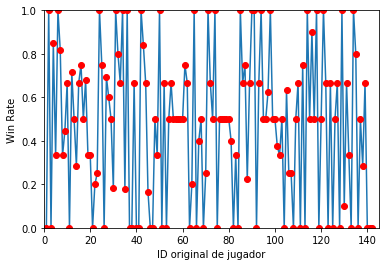

In [20]:
#Hacemos un plot de el winrate con respecto a los ID-s
r = estadistica[1:143,0]
t = estadistica[1:143,3]
plt.plot(r, t)

plt.plot(r, t, 'ro')
plt.axis([0, 145, 0, 1])
plt.ylabel('Win Rate')
plt.xlabel('ID original de jugador')
plt.show()
#vemos que ya tiene cara de una sigmoide solo hay que ordenar los ID-s con respecto a el winrate

In [21]:
#Definimos un nuevo dataframe llamado estadistica1 a partir de la matriz estadistica
estadistica1 = pd.DataFrame(estadistica)
#renombramos columnas del nuevo df
estadistica1.columns=['IDA','IDB','nos','WR']
#redefinimos nuestro df como el estadistica con los valores ordenados de menor a mayor del winrate
estadistica1 = estadistica1.sort_values(by=['WR'])
#reseteamos indices pero conservamos los viejos
estadistica1 = estadistica1.reset_index()
#Hacemos un array de estadistica1
wr = estadistica1.to_numpy()
#mostramos el array nuevo
wr

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.00000000e+01, 4.00000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.10000000e+01, 4.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.60000000e+01, 4.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.70000000e+01, 4.70000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.10000000e+01, 5.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.30000000e+01, 5.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.30000000e+01, 6.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.60000000e+01, 6.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.90000000e+01, 6.90000000e+01, 2.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.41000000e+02, 1.4100

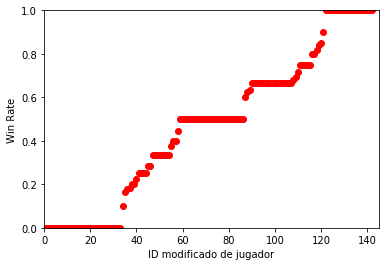

In [22]:
#dado que se agrego una nueva columna de indices, ahora nuestro win rate esta en la cuarta columna
#considerando columna 0 es la de los indices viejos
#definimos a t como nuestros winrates ya ordenados
t=wr[1:143,4]
#de lo anterior r iba de 1 hasta 142 por lo que podemos pensarlo de la siguiente manera: el id 1 corresponde a una
#persona cuyo winrate es el mas bajo, y asi sucesivamente hasta llegar al id 142 que sera de la persona con mayor winrate 
plt.plot(r, t, 'ro')
plt.axis([0, 145, 0, 1])
plt.ylabel('Win Rate')
plt.xlabel('ID modificado de jugador')
plt.show()
#vemos que la grafica es mucho mas parecida a una funcion sigmoide

Ya vimos que el winrate hace que tengamos un orden o da un orden de prioridad. Y de hecho esto se cumprueba con la ultima greafica donde se ve una buena aproximacion funcion sigmoide. Intuitivamente si enfrentamos a una persona cuyo winrate es cero contra una cuyo winrate es diferente de cero, entonces seguro va a ganar la segunda. En caso en el que una persona cuyo winrate sea 1 la enfrentamos a otra cuyo winrate sea menor que 0.5, entonces es mucho mas probable que la primera persona gane, de hecho la prediccion deberia ser asi.
A partir de aqui podemos tomar dos caminos: reasignar los ID's de tal forma que se preserve la funcion sigmoide o sustituir los ID's por el winrate. Hasta este punto ya se hizo lo segundo, por lo que se tomara ese camino. Aunque intuitivamente ambos caminos son analogos, ya que, en el primer caso, se define un orden.

La verosimilitud de atributos independientes se define como
$$L(\theta) = \prod_{i=1}^{n} P(Y=y^{(i)}|X=\vec{x}^{(i)})$$
Considerando que para la regresion logistica el resultado proviene de una distribucion de Bernoulli tenemos que $P(Y=y^{(i)}|X=x^{(i)})=\sigma (\theta ^{T}\vec{x})^{y} \cdot \left[ 1-\sigma (\theta ^{T}\vec{x})^{y}\right]^{1-y}$, donde $\sigma$ es la funcion sigmoide dada por: $\sigma(z) = \frac{1}{1+exp(-z)}$. Sustituyendo en la verosimilitud obtenemos que:
$$L(\theta) = \prod_{i=1}^{n} \sigma (\theta ^{T}\vec{x}^{(i)})^{y^{(i)}} \cdot \left[ 1-\sigma (\theta ^{T}\vec{x}^{(i)})\right]^{1-y^{(i)}}$$
al aplicar el logaritmo de la verosimilitud obtenemos la log-verosimilitud dada por:
$$LL(\theta) = \sum_{i=1}^{n} y^{(i)}log(\sigma (\theta ^{T}\vec{x}^{(i)})) + (1-y^{(i)}) log\left[ 1-\sigma (\theta ^{T}\vec{x}^{(i)})\right]$$
Una vez que se tiene la funcion de la log-verosimilitud, simplemente debemos elegir los valores de $\theta$ que las maximicen. Sabemos que la ecuacion de la primera derivada con respecto a $\theta_j$ no tiene solucion cerrada. Por ello es necesario usar el metodo del descenso del grandiente. La ecuacion de la derivada esta dada por
$$\frac{\partial}{\partial \theta_j}LL(\theta) = \sum_{i=1}^{n}\left[y^{(i)}- \sigma (\theta ^{T}\vec{x}^{(i)})\right]x_j^{(i)} $$
Y la regla de actualizacion del decenso del gradiente es:
$$\theta_{j}^{t+1}=\theta_{j}^{t}+ \eta \frac{\partial}{\partial \theta^{t}}LL(\theta_j^{t})$$
donde $\eta$ es la magnitud del paso. Entonces, para hacer regresion logistica tenemos que encontrar los valores de $\theta$ que maximicen. $j$ es la cantidad de variables independientes mas el valor de $\theta_0$

In [23]:
#Creamos en las variables xTr yTr nuestras variables dependientes e independientes de la matrizPrueba
#que son los datos originales sustituyendo el ID jugador por el winrate, lo mismo para xVa e yVa
xTr = matrizPrueba[:,:2]
yTr = matrizPrueba[:,2]
xVa = matrizPrueba1[:,:2]
yVa = matrizPrueba1[:,2]
#creamos un array de unos de la mismas filas de las filas de xTr y una columna, esto para poder calcular theta_0
unos = np.ones((xTr.shape[0],1),dtype=np.float32)
#le pegamos a la columna de unos los datos de xTr
xTr = np.append(unos,xTr,axis=1)
#creamos un array de unos de la mismas filas de las filas de xVa y una columna, esto para poder hacer validacion
unos = np.ones((xVa.shape[0],1),dtype=np.float32)
#le pegamos a la columna de unos los datos de xT
xVa = np.append(unos,xVa,axis=1)

In [24]:
#definimos una funcion llamada sigmoide que no es exactamente la sigmoide original pero si la resta entre
#el valor real y menos sigmoide(vector_theta_Transpuesto por vector_x) y nos va a regresar dicha resta
def sigmoide(x,y,theta):
    sigma = y - ((1)/(1+np.exp(-(theta.T@x))))
    return sigma

In [25]:
#definimos nuestra funcion de perdida que es el negativo de la verosimilitud logaritmica
#definido en las slides de la clase, archivo 3a_regresion_clasificacion_lineal.pdf slide 43
#esta funcion nos regresa un valor de error
def loss(x,y,theta):
    error = (y*np.log((1/(1+np.exp(-(theta.T@x))))))+((1-y)*np.log(1-((1/(1+np.exp(-(theta.T@x)))))))
    return error

In [26]:
#definimos nuestra funcion de entrenamiento para determinar el vector de Theta que minimiza el error
#con ayuda del descenso del gradiente. Esta funcion come vectores x, vectores y e un entero iteraciones
def entrena(x,y,iteraciones):
    #definimos una lista que contendra los errores para cada iteracion (distintos valores de theta)
    historicoLoss = []
    #definimos nuestro vector de Thetas (theta_0,theta_1,theta_2) todos se inicializan en cero
    theta = np.zeros((3,1),dtype=np.float32)
    #iteramos sobre las iteraciones definidas por el usuario
    for pasos in range(iteraciones):
        #Reseteamos/seteamos el gradiente como un vector de ceros (cada entrada sera el gradiente para cada variable)
        gradiente = np.zeros((3,1),dtype=np.float32)
        #Reseteamos/seteamos la perdida para cada iteracion en las filas de x en cero
        perdidaiter = 0
        #para cada fila del vector de entrada x
        for u in range(x.shape[0]):
            #para cada fila del vector theta (son 3)
            for r in range(theta.shape[0]):
                #para una fila dada de theta, suma iterativamente el gradiente + x en la fila u, columna r
                #por la funcion sigmoide que definimos antes con entradas el vector x en la fila, el valor
                #real y en la fila u y el parametro theta
                #Todo esto es la definicion del gradiente o derivada de la funcion error
                gradiente[r] = gradiente[r] + x[u][r]*sigmoide(x[u],y[u],theta)
            #una vez que terminas de calcular el gradiente en una fila dada, suma iterativamente
            #la perdida en cada iteracion hasta terminar las filas de x
            perdidaiter += loss(x[u],y[u],theta)
        #una vez que termines de calcular el gradiente y la perdida de cada fila, actualiza el valor del vector
        #theta haciendo uso de el paso definido como 0.01 y el gradiente calculado, repite con este nuevo vector
        #theta hasta acabar las iteraciones
        theta += 0.01*gradiente
        #en la lista de perdidas agrega la perdida que calculaste
        historicoLoss.append(-1*perdidaiter[0])
    #regresa el ultimo valor de theta y la lista de perdidas
    return theta,historicoLoss

In [27]:
#A partir de aqui y hasta nuevo aviso hacemos de forma manual lo que se hace en la funcion de 
#entrenamiento. De hecho, esto lo hice primero antes que la funcion y se deja porque me duele
#borrar 1 dia entero de mi trabajo :c
#definimos nuestro vector de Thetas (theta_0,theta_1,theta_2) todos se inicializan en cero
paramTheta = np.zeros((3,1),dtype=np.float32)
#Seteamos el gradiente como un vector de ceros (cada entrada sera el gradiente para cada variable)
grad = np.zeros((3,1),dtype=np.float32)
#vemos las dimensiones de la matriz de parametros theta
paramTheta.shape

(3, 1)

In [28]:
#definimos una lista que contendra los errores para cada iteracion (distintos valores de theta)
historicoPerdida = []
#iteramos sobre 800 iteraciones
for pasos in range(800):
    #Reseteamos/seteamos el gradiente como un vector de ceros (cada entrada sera el gradiente para cada variable)
    grad = np.zeros((3,1),dtype=np.float32)
    #Reseteamos/seteamos la perdida para cada iteracion en las filas de x en cero
    perdida = 0
    #para cada fila del vector xTr previamente definido
    for i in range(xTr.shape[0]):
        #para cada fila del vector theta (son 3)
        for k in range(paramTheta.shape[0]):
            #para una fila dada de theta, suma iterativamente el gradiente + x en la fila u, columna r
            #por la funcion sigmoide que definimos antes con entradas el vector x en la fila, el valor
            #real y en la fila u y el parametro theta
            #Todo esto es la definicion del gradiente o derivada de la funcion error
            grad[k] = grad[k] + xTr[i][k]*sigmoide(xTr[i],yTr[i],paramTheta)
        #una vez que terminas de calcular el gradiente en una fila dada, suma iterativamente
        #la perdida en cada iteracion hasta terminar las filas de x
        perdida += loss(xTr[i],yTr[i],paramTheta)
    #una vez que termines de calcular el gradiente y la perdida de cada fila, actualiza el valor del vector
    #theta haciendo uso de el paso definido como 0.01 y el gradiente calculado, repite con este nuevo vector
    #theta hasta acabar las iteraciones
    paramTheta += 0.01*grad
    #en la lista de perdidas agrega la perdida que calculaste
    historicoPerdida.append(-1*perdida[0])

In [29]:
#comprobamos los parametros de theta calculados en la ultima iteracion
paramTheta

array([[-0.11792607],
       [-4.2769775 ],
       [ 4.4941564 ]], dtype=float32)

In [30]:
#vemos el vector gradiente en la ultima iteracion
grad

array([[-1.0413550e-05],
       [ 1.8977220e-05],
       [ 1.9295856e-05]], dtype=float32)

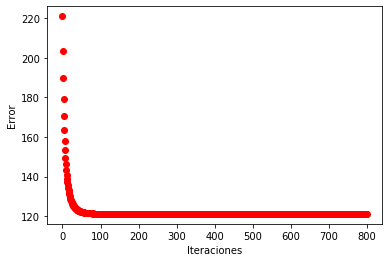

In [31]:
#graficamos el error con respecto a las iteraciones usando la lista del historicoPerdida
#definido en la forma manual. Aqui termina la forma manual
plt.figure()
plt.plot(range(len(historicoPerdida)), historicoPerdida, 'ro')
plt.ylabel('Error')
plt.xlabel('Iteraciones')
plt.show()

In [32]:
#Usando la forma con la funcion definida de entrena, pasamos los vectores xTr e yTr
#con las mismas iteraciones que la forma manual, esto para comprobar que efectivamente
#la funcion hace lo mismo que la forma manual
ajusteParam,perdidas = entrena(xTr,yTr,800)
#mostramos los parametros del ajuste
ajusteParam

array([[-0.11792607],
       [-4.2769775 ],
       [ 4.4941564 ]], dtype=float32)

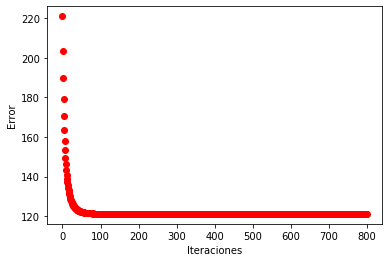

In [33]:
#graficamos el error en funcion de las iteraciones usando la lista perdidas
#definida en la forma automatica o forma funcional
plt.figure()
plt.plot(range(len(perdidas)), perdidas, 'ro')
plt.ylabel('Error')
plt.xlabel('Iteraciones')
plt.show()

Notemos que la forma manual y funcional dan los mismos resultados, por lo que consideramos que la forma funcional esta bien definida con respecto a la forma manual. Notemos que el error tiende a un valor conforme las iteraciones se hacen mas grandes, este valor es aproximadamente 121. El error es grande pero es lo que hay :c, quiza con otra reparametrizacion el error disminuye pero no se me ocurre otra forma de reparametrizar los datos.
Ahora vamos a predecir los datos de validacion y veamos nuestro accuracy.

In [34]:
#Definimos la funcion sigmoide original y la llamamos predice
def predice(x,theta):
    #funcion sigmoide original calculada con los vectores de entrada theta y x
    sigma = ((1)/(1+np.exp(-(theta.T@x))))
    #regresa el valor de sigma
    return sigma

In [35]:
#crea un nuevo array que contendra nuestras predicciones a partir de nuestro modelo entrenado
#que nos arrojo nuestro vector de thetas optimo
yPred = np.zeros((xVa.shape[0],),dtype=int)
#creamos un array que contiene las probabilidades
probabilidades = np.zeros((xVa.shape[0],),dtype=float)
#itera sobre las filas del vector xVa
for i in range(xVa.shape[0]):
    #define el float z que contendra la prediccion del vector en la fila[i] de xVa, usa las thetas optimas
    #previamente calculadas por nuestro modelito
    z = predice(xVa[i],ajusteParam)
    #guarda a z en la fila i del array probabilidades
    probabilidades[i] = z
    #si z es mayor que 0.5, entonces la prediccion es 1
    if z >0.5:
        yPred[i] = 1
    #en otro caso, entonces la prediccion es 0
    else:
        yPred[i]=0    

In [36]:
#imprime nuestro array de predicciones
yPred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1])

In [37]:
#imprime el array de resultados original
yVa

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [38]:
#imprime el accuracy score para el array de predicciones y el original
print(accuracy_score(yPred,yVa))

0.7130434782608696


A pesar de que el error no lo pudimos bajar de 121, debido a la naturaleza del problema, obtenemos un accuracy del 70% que se considera bastante decente. Ahora veamos sus curvas ROC

In [39]:
#definimos funcion de falsos positivos
def radio_falsos_positivos(probabilities, thres):
    return np.mean(probabilities >= thres)

In [40]:
#definimos funcion de verdaderos positivos
def radio_verdaderos_positivos(probabilities, thres):
    return np.mean(probabilities >= thres)

In [41]:
#definimos funcion que calcula curva roc
def roc(probabilities, y):
    positivos = np.where(y == 1)
    negativos = np.where(y == 0)

    rvps = np.zeros(np.unique(probabilities).shape[0])
    rfps = np.zeros(np.unique(probabilities).shape[0])
    
    for i, p in enumerate(np.unique(probabilities)[::-1]):
        rvps[i] = radio_verdaderos_positivos(probabilities[positivos], p)
        rfps[i] = radio_falsos_positivos(probabilities[negativos], p)

    return rvps, rfps

In [42]:
#funcion que calcula el area bajo la curva roc usando la formula de shoelace
def area_poligono(vertices):
    area = 0.0
    n_vert = len(vertices)
    for i in range(n_vert - 1):
        area = area + vertices[i][0] * vertices[i + 1][1]
        area = area - vertices[i + 1][0] * vertices[i][1]

    area = area + vertices[n_vert - 1][0] * vertices[0][1]
    area = area - vertices[0][0] * vertices[n_vert - 1][1]

    return 0.5 * abs(area)

def aucroc(tfp, tvp):
    auc = 0.0
    fprev = 0.0
    vprev = 0.0
    for i,(f,v) in enumerate(zip(tfp, tvp)):
        auc += area_poligono([[fprev, 0], [fprev, vprev], [f, v], [f, 0]])
        fprev = f
        vprev = v

    return auc + area_poligono([[fprev, 0], [fprev, vprev], [1, 1], [1, 0]])

In [43]:
#con la funcion que calcula la curva roc le damos de comer la matriz de probabilidades definida previamente
#y el vector de yValidacion (valores reales) y nos regresa el rasdio de verdaderos positivos (TPR) la guardamos en
#la variable rvps y el radio de falsos positivos (FPR)
rvps, rfps = roc(probabilidades, yVa)

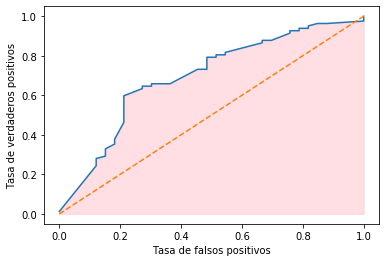

In [44]:
#GRaficamos el TPR en funcion del FPR previamente calculados
plt.plot(rfps, rvps)
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(rfps, rvps, 0, alpha=0.5, color = 'pink')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.show()

In [45]:
#calculamos el area bajo la curva definida por el TPR y FPR
aucroc(rfps, rvps)

0.6930894308943091

Veamos que el area bajo la curva ROC es de 0.7 que tambien se considera es un modelo decente.

In [46]:
#Para la curva precision-exahustividad sabemos que por definicion el radio de verdaderos positivos
#es igual a la exahustividad, que ya se calculo previamente. Solo basta calcular la precision. Para ello:
#define una matriz llamada positivos cuyos valores corresponden a la posicion para la cual hay un 1 en el 
#vector de validacion
positivos = np.where(yVa == 1)
#define una matriz llamada negativos cuyos valores corresponden a la posicion para la cual hay 1 en el vector
#yPred (predicciones) y ademas en la matriz yVa (valores reales) haya un cero. Esto se hace ya que recordemos
#que los falsos positivos se definen como un resultado que indica la existencia de una condicion cuando en
#realidad no lo es. Traducido a nuestro problema vemos que esto corresponde a el resultado en nuestra prediccion
#que nos dice que si gano un jugador cuando no es verdad. Notemos que la contraparte descrita como no gano cuando
#en realidad si lo hizo corresponde a un falso negativo.
negativos = np.where((yPred==1) & (yVa != yPred))
#definimos nuestro vector de precision que tendra dimension del numero de valores diferentes en la matriz probabilidades
precision = np.zeros(np.unique(probabilidades).shape[0])

#iteramos i de 0 hasta el tamano de la matriz probabilidades, p se define como el valor de las probabilidad en la
#posicion i
for i, p in enumerate(np.unique(probabilidades)[::-1]):
    #definimos el float verdaderos positivos como la suma (el total de valores que cumplen la condicion)
    #de aquellos valores en la posicion guardada en el array positivos tal que son mayores o iguales que p 
    truePositives = np.sum(probabilidades[positivos] >= p)
    #definimos el float falsos positivos como la suma (el total de valores que cumplen la condicion)
    #de aquellos valores en la posicion guardada en el array negativos tal que son mayores o iguales que p 
    falsePositives = np.sum(probabilidades[negativos] >= p)
    #guarda en la posicion i del array precision el cociente de los verdaderos positivos entre verdaderos
    #positivos mas falsos positivos (definicion de exahustividad)
    precision[i] = (truePositives)/(falsePositives+truePositives)

In [47]:
#mostramos el array precision recien calculado
precision

array([1.        , 0.83333333, 0.84      , 0.85185185, 0.82758621,
       0.83333333, 0.84375   , 0.82857143, 0.83333333, 0.83783784,
       0.84444444, 0.8627451 , 0.86538462, 0.87037037, 0.875     ,
       0.85245902, 0.85483871, 0.84126984, 0.84375   , 0.83076923,
       0.81818182, 0.8       , 0.78947368, 0.79220779, 0.80246914,
       0.79268293, 0.79518072, 0.78571429, 0.78823529, 0.79069767,
       0.79775281, 0.8       , 0.8       , 0.80645161, 0.80851064,
       0.80851064, 0.81052632, 0.81052632, 0.8125    , 0.81443299,
       0.81443299, 0.81632653, 0.81818182, 0.82      ])

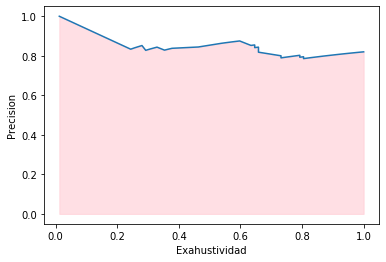

In [48]:
#graficamos la curva precision-exahustividad
plt.plot(rvps,precision)
plt.fill_between(rvps,precision, 0, alpha=0.5, color = 'pink')
plt.xlabel('Exahustividad')
plt.ylabel('Precision')
plt.show()

In [49]:
#mostramos el area bajo la curva de la grafica precision-exahustividad
#usando la funcion que calcula el area definida previamente
aucroc(rvps,precision)

0.8446761907982621

* Compara el clasificador bayesiano ingenuo y regresión logística en este problema. ¿Qué ventajas y desventajas tienen los modelos entrenados? ¿Qué pasaría si se entrena el clasificador bayesiano ingenuo con los vectores reparametrizados o si se entrena un modelo de regresión logística usando los vectores de entrada originales? ¿Consideras que las presuposiciones de cada clasificador son apropiadas para los datos del problema? ¿Para este tipo de problemas cuál de los dos recomendarías y por qué?

Entrenemos nuestro naive Bayes con los datos reparametrizados:

In [50]:
xw = matrizPrueba[:,0:2]
yw = matrizPrueba[:,2]
xww = matrizPrueba1[:,0:2]
yww = matrizPrueba1[:,2]

naiveCati = CategoricalNB(alpha=0.01)
naiveCati.fit(xw,yw)
prediccion = naiveCati.predict(xww)

#usamos la funcion accuracy_score entre las variables prediccion e yValid
#tal y como fueron definidos. Esta funcion muestra el porcentaje de clasificaciones buenas
#que hace el modelo con respecto a todas las muestras
print(accuracy_score(prediccion,yww))

0.7217391304347827


In [51]:
ceros = np.zeros((1,2))
naiveCati.predict(ceros)

array([1.])

In [52]:
ceros = np.zeros((2,1))
un = np.ones((1,1),dtype=np.float32)
ceros = np.append(un,ceros,axis=0)
pr = predice(ceros,ajusteParam)
pr

array([[0.4705526]])

Veamos que la reparemetrizacion si afecta el rendimiento del clasificador, ya que originalmente, para obtener 0.73 de accuracy con los datos originales, fue necesario aumentar el valor del suavizado de laplace a 20, mientras que para este caso el suavizado fue de 0.01 y se obtuvo practicamente el mismo acurracy. Si se usa 0.01 como suavizado de laplace con los datos originales, el accuraccy decrece hasta 0.69, un 3% menos pero es ya algo significativo.
Ahora entrenemos nuestra regresion logistica con los datos originales.

In [53]:
unos = np.ones((xTrain.shape[0],1),dtype=np.float32)
#le pegamos a la columna de unos los datos de xTrain
xTrainOrig = np.append(unos,xTrain,axis=1)
#creamos un array de unos de la mismas filas de las filas de xValid y una columna, esto para poder hacer validacion
unos = np.ones((xVa.shape[0],1),dtype=np.float32)
#le pegamos a la columna de unos los datos de xValid
xValidOrig = np.append(unos,xValid,axis=1)
ajusteOriginales,perdidaOrig = entrena(xTrainOrig,yTrain,800)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Vemos que de entrada se tienen multiples problemas como overflow o division entre cero, por lo que no es factible hacer regresion logistica con los datos originales.

Por otro lado, el accuracy score de la regresion logistica como se planteo es de 0.71, que es muy similar con el naive Bayes entrenado para datos reparametrizados y datos originales. Sin embargo, con la regresion logistica obtenemos mas informacion con las curvas ROC y precision exahustividad, que para el caso de naive Bayes no estan definidas. Dado que el acurracy es muy similar, entonces yo recomendaria usar la regresion logistica, ya que obtenemos mas informacion con las curvas, que pueden ser escenciales a la hora de la evaluacion de datos nuevos de entrada.

Con respecto a los datos podemos decir que el hecho de que varios jugadores tengan winrate de 0 nos mete muchisimo ruido, ya que observemos que al intentar predecir el resultado de un juego en el cual los dos jugadores tienen un winrate de 0, Naive predice que siempre va a ganar el jugador de la segunda columna, mientras que la regresion logistica nos dice que va a ganar el que se coloca en la primera columna (ver 4 celdas atras. Ahi se hacen las predicciones). La posicion del jugador en la tabla (primera o segunda columnas) es informacion no relevante pero vemos que para este conjunto de datos si lo es, al igual que el clasificador. Para evitar esto es necesario agregar otras columnas con respecto a la informacion de los jugadores que si sea relevante como por ejemplo si es un jugador experto o no. Ademas el winrate no es informacion tan relevante en la vida real, supongamos que enfrentamos a dos jugadores cuyo winrate no es muy diferente necesartiamente ganara aquel que tiene mayor winrate? La respuesta es no, el go es un juego que requiere habilidad y un poco de suerte. Este hecho se logro observar. El regresor dara prioridad a aquel cuyo winrate sea mayor pero en los datos de validacion se observan casos donde jugadores de menor winrate gana la partida. Un caso analogo sucede cuando enfrentamos a dos jugadores con winrate de 1 ¿A quien le damos preferencia y porque? Supongo que la preferencia se basa, en estos casos, en la posicion del jugador en la tabla, si en la primera columna hay jugadores que ganaron mas, entonces la preferencia es sobre esa primera columna. Resumiendo, si quisieramos mejorar las predicciones necesitamos mas variables que caractericen al jugador. El winrate es solo un numero que mide la cantidad de partidas ganadas en funcion de las partidas totales jugadas y la base de datos no es homogenea con respecto a las partidas jugadas de cada jugador. Existen casos en los que un jugador jugo 3 partidas, mientras que otro lo hizo mas de 10 veces. De esta forma, es de esperar que Naive, tanto como la regresion no sean tan buenos a la hora de predecir.

Naive tiene la ventaja de tener una implementacion mas sencilla que el regresor lineal y no dependemos del calculo del error, solo hay que evaluar las distribuciones de clase y hallar el maximo. Tambien, Naive es muy flexible con respecto a la reparametrizacion. La regresion lineal requiere hacer descenso por gradiente para hallar los parametros de theta, por ende no podemos asegurar que los parametros calculados son la solucion a la ecuacion de la derivada del error aunque si una aproximacion decente.
Por otro lado, como ya comenté la regresion lineal ofrece más informacion del ajuste mediante las curvas ROC y precision exahustividad. Este modelo no me fue posible ajustarlo con los datos originales debido a overflow en la funcion exponencial

Para el caso de la regresion, los datos no son apropiados, ya que son necesarios una mayor cantidad de datos de entrenamiento para obtener mejorias. Para ambos casos no sabemos si los datos de entrenamiento son realmente independientes, ya que puede suceder que existan mas de una partida ente un jugador j y un jugador i con resultados diferentes. Eso no lo podemos asegurar sin revisar con cuidado los datos. Por lo que de esta forma se pierde la suposicion de independencia entre variables.

* Deriva la regla de actualizacion para el algoritmo del descenso por gradiente de un clasificador donde $\hat{y}=sigm(\theta^{T}\vec{x})$ y la funcion de perdida sea:
$$E(\theta) = \frac{1}{2}\sum_{i=1}^{n}\left( \hat{y}^{(i)}-y^{(i)} \right)$$
Discute las diferencias entre este clasificador y el de regresion logistica y compara sus rendimientos en la tarea de prediccion de juegos

Basta con encontrar $\frac{d}{d\theta}E(\theta)$, para ello reescribimos $E(\theta)$ en forma vectorial dada como:
$$E(\vec{\theta})=\frac{1}{2}(p-y)$$ donde $p=sigm(\theta^{T}\vec{x})$.
Usando la regla de la cadena tenemos que:
$$\frac{\partial}{\partial \theta_j}=\frac{\partial}{\partial p}\frac{\partial p}{\partial z}\frac{\partial z}{\partial \theta_j}$$.
Entonces:
$$\frac{\partial E}{\partial p} = 1/2$$
Como $p=sigm(z)$, donde $z=\theta^{T}\vec{x}$, luego
$$\frac{\partial p}{\partial z}= sigm(z)(1-sigm(z)) $$
Como $z=\theta^{T}\vec{x}$ entonces:
$$\frac{\partial z}{\partial \theta_j}=x_j$$
De esta forma tenemos que:
$$\frac{\partial E}{\partial \theta_j}=\frac{\partial E}{\partial p}\frac{\partial p}{\partial z}\frac{\partial z}{\partial \theta_j} = \frac{1}{2}sigm(z)(1-sigm(z))x_j$$
Sustituyendo las $z$ tenemos que:
$$\frac{\partial E}{\partial \theta_j}=\frac{1}{2}sigm(\theta^{T}\vec{x})(1-sigm(\theta^{T}\vec{x}))x_j$$
que no depende de $y$. Entonces usando la definicion del ascenso del gradiente, tenemos que la regla de actualizacion es:
$$\theta^{t+1}=\theta^{t}+\eta \frac{\partial E}{\partial \theta}$$
Que resulta ser:
$$\theta^{t+1}=\theta^{t}+\eta \left( \left(\frac{1}{2}\right) sigm(\theta^{T}\vec{x})(1-sigm(\theta^{T}\vec{x}))x_j \right)$$
O en forma algebraica:
$$\theta^{t+1}=\theta^{t}+\eta \left( \left(\frac{1}{2}\right)\sum_{i=1}^{n} sigm(\theta^{T}\vec{x}^{(i)})(1-sigm(\theta^{T}\vec{x}^{(i)}))x_j^{(i)} \right)$$
El gradiente tampoco tiene solucion cerrada por esa razon debe usarse descenso del gradiente

In [54]:
#definimos nuestra funcion de perdida que es el negativo de la verosimilitud logaritmica
#definido en las slides de la clase, archivo 3a_regresion_clasificacion_lineal.pdf slide 43
#esta funcion nos regresa un valor de error
def nuevoloss(x,y,theta):
    error = 0.5*((1/(1+np.exp(-(theta.T@x))))-y)
    return error

In [55]:
#definimos nuestra funcion de entrenamiento para determinar el vector de Theta que minimiza el error nuevo
#con ayuda del descenso del gradiente. Esta funcion come vectores x, vectores y e un entero iteraciones
def nuevoentrena(x,y,iteraciones):
    #definimos una lista que contendra los errores para cada iteracion (distintos valores de theta)
    perdida = []
    #definimos nuestro vector de Thetas (theta_0,theta_1,theta_2) todos se inicializan en cero
    theta = np.zeros((3,1),dtype=np.float32)
    #iteramos sobre las iteraciones definidas por el usuario
    for pasos in range(iteraciones):
        #Reseteamos/seteamos el gradiente como un vector de ceros (cada entrada sera el gradiente para cada variable)
        gradiente = np.zeros((3,1),dtype=np.float32)
        #Reseteamos/seteamos la perdida para cada iteracion en las filas de x en cero
        perdidaiter = 0
        #para cada fila del vector de entrada x
        for u in range(x.shape[0]):
            #para cada fila del vector theta (son 3)
            for r in range(theta.shape[0]):
                #para una fila dada de theta, suma iterativamente el gradiente + x en la fila u, columna r
                #por la funcion sigmoide que definimos antes con entradas el vector x en la fila, el valor
                #real y en la fila u y el parametro theta
                #Todo esto es la definicion del gradiente o derivada de la nueva funcion error
                gradiente[r] = gradiente[r] + x[u][r]*predice(x[u],theta)*(1-predice(x[u],theta))
            #una vez que terminas de calcular el gradiente en una fila dada, suma iterativamente
            #la perdida en cada iteracion hasta terminar las filas de x
            perdidaiter += nuevoloss(x[u],y[u],theta)
        #una vez que termines de calcular el gradiente y la perdida de cada fila, actualiza el valor del vector
        #theta haciendo uso de el paso definido como 0.01 y el gradiente calculado, repite con este nuevo vector
        #theta hasta acabar las iteraciones
        theta += 0.001*0.5*gradiente
        #en la lista de perdidas agrega la perdida que calculaste
        perdida.append(-1*perdidaiter[0])
    #regresa el ultimo valor de theta y la lista de perdidas
    return theta,perdida

In [56]:
#Usando la forma con la funcion definida de entrena, pasamos los vectores xTr e yTr
#con las mismas iteraciones que la forma manual, esto para comprobar que efectivamente
#la funcion hace lo mismo que la forma manual
nuevoAjusteParam,nuevaPerdida = nuevoentrena(xTr,yTr,800)
#mostramos los parametros del ajuste
nuevoAjusteParam

array([[3.5738623],
       [1.6087385],
       [1.7231103]], dtype=float32)

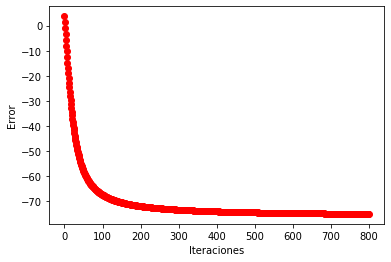

In [57]:
#graficamos el error en funcion de las iteraciones usando la lista perdidas
#definida en la forma automatica o forma funcional
plt.figure()
plt.plot(range(len(nuevaPerdida)), nuevaPerdida, 'ro')
plt.ylabel('Error')
plt.xlabel('Iteraciones')
plt.show()

Vemos que con esta nueva funcion de error, la perdida calculada con el descenso del gradiente es de -76, que, si consideramos el valor absoluto, esta nueva funcion nos reduce el error en aproximadamente 40 unidades. Por lo que esperamos que el accuracy de este nuevo modelo sea mayor con respecto a la regresion logistica con su funcion de error definida en las slides. Veamos si esto es verdad.

In [58]:
#crea un nuevo array que contendra nuestras predicciones a partir de nuestro nuevo modelo entrenado
#que nos arrojo nuestro vector de thetas optimo
yNuevoPred = np.zeros((xVa.shape[0],),dtype=int)
#creamos un array que contiene las probabilidades
probabilidadesNuevo = np.zeros((xVa.shape[0],),dtype=float)
#itera sobre las filas del vector xVa
for i in range(xVa.shape[0]):
    #define el float z que contendra la prediccion del vector en la fila[i] de xVa, usa las thetas optimas
    #previamente calculadas por nuestro nuevo modelito
    z = predice(xVa[i],nuevoAjusteParam)
    #guarda a z en la fila i del array probabilidades
    probabilidadesNuevo[i] = z
    #si z es mayor que 0.5, entonces la prediccion es 1
    if z >0.5:
        yNuevoPred[i] = 1
    #en otro caso, entonces la prediccion es 0
    else:
        yNuevoPred[i]=0    

In [59]:
yNuevoPred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [60]:
yVa

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.])

In [61]:
print(accuracy_score(yNuevoPred,yVa))

0.7130434782608696


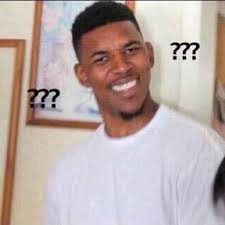

Entrenemos con solo 3 iteraciones (error proximo a cero)

In [62]:
nuevoAjusteParam1,nuevaPerdida1 = nuevoentrena(xTr,yTr,4)

yNuevoPred1 = np.zeros((xVa.shape[0],),dtype=int)
#creamos un array que contiene las probabilidades
probabilidadesNuevo1 = np.zeros((xVa.shape[0],),dtype=float)
#itera sobre las filas del vector xVa
for i in range(xVa.shape[0]):
    #define el float z que contendra la prediccion del vector en la fila[i] de xVa, usa las thetas optimas
    #previamente calculadas por nuestro nuevo modelito
    z1 = predice(xVa[i],nuevoAjusteParam1)
    #guarda a z en la fila i del array probabilidades
    probabilidadesNuevo1[i] = z1
    #si z es mayor que 0.5, entonces la prediccion es 1
    if z >0.5:
        yNuevoPred1[i] = 1
    #en otro caso, entonces la prediccion es 0
    else:
        yNuevoPred1[i]=0    

In [63]:
print(accuracy_score(yNuevoPred1,yVa))

0.7130434782608696


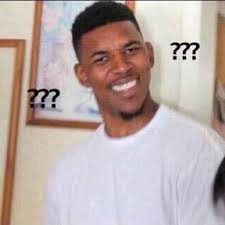

In [64]:
yNuevoPred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

Vemos que al entrenar con los supuestos parametros optimos y con los parametros tales que el error sea cercano a cero (4 iteraciones) el accuracy score del nuevo modelo coincide exactamente con el acurracy de la regresion lineal original. Sin embargo, vemos que las predicciones para los primeros dos casos predicen que el jugador en la segunda columna siempre va a ganar sin importar nada. Esto se parece mas a un volado con moneda cargada. Entonces, el hecho de que el error disminuya al cambiar el modelo no implica una mejora en la prediccion. Ahora veamos las curvas ROC y precision exahustividad de este nuevo modelo.

In [65]:
#con la funcion que calcula la curva roc le damos de comer la matriz de probabilidades definida previamente
#y el vector de yValidacion (valores reales) y nos regresa el rasdio de verdaderos positivos (TPR) la guardamos en
#la variable rvps y el radio de falsos positivos (FPR)
rvpsNuevo, rfpsNuevo = roc(probabilidadesNuevo, yVa)

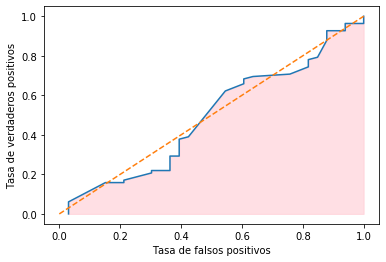

In [66]:
#GRaficamos el TPR en funcion del FPR previamente calculados
plt.plot(rfpsNuevo, rvpsNuevo)
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(rfpsNuevo, rvpsNuevo, 0, alpha=0.5, color = 'pink')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.show()

In [67]:
#calculamos el area bajo la curva definida por el TPR y FPR
aucroc(rfpsNuevo, rvpsNuevo)

0.4876201034737621

Vemos que efectivamente, la curva ROC nos muestra que este modelo tiene un nuevo comportamiento y se hacerca a la del lanzamiento de una moneda ligeramente cargada. El area bajo la curva es de 0.48 que nos dice que este modelo tiene un accuracy de 70% por pura suerte, es decir el modelo le atino a equivocarse en la misma cantidad de veces que la regresion original. Con esta informacion afirmamos que este nuevo modelo no es para nada util.
De nuevo aqui surge la discusion de que modelo escoger y refuerza mi conclusion. Imaginemos que entrenamos un Naive tal que reproduzca el accuracy de la regresion lineal pero no sabemos si estas predicciones fueron suerte tal y como este modelo lo hizo.

In [68]:
#Para la curva precision-exahustividad sabemos que por definicion el radio de verdaderos positivos
#es igual a la exahustividad, que ya se calculo previamente. Solo basta calcular la precision. Para ello:
#define una matriz llamada positivos cuyos valores corresponden a la posicion para la cual hay un 1 en el 
#vector de validacion
positivosNuevo = np.where(yVa == 1)
#define una matriz llamada negativos cuyos valores corresponden a la posicion para la cual hay 1 en el vector
#yPred (predicciones) y ademas en la matriz yVa (valores reales) haya un cero. Esto se hace ya que recordemos
#que los falsos positivos se definen como un resultado que indica la existencia de una condicion cuando en
#realidad no lo es. Traducido a nuestro problema vemos que esto corresponde a el resultado en nuestra prediccion
#que nos dice que si gano un jugador cuando no es verdad. Notemos que la contraparte descrita como no gano cuando
#en realidad si lo hizo corresponde a un falso negativo.
negativosNuevo = np.where((yNuevoPred==1) & (yVa != yNuevoPred))
#definimos nuestro vector de precision que tendra dimension del numero de valores diferentes en la matriz probabilidades
precisionNuevo = np.zeros(np.unique(probabilidadesNuevo).shape[0])

#iteramos i de 0 hasta el tamano de la matriz probabilidades, p se define como el valor de las probabilidad en la
#posicion i
for i, p in enumerate(np.unique(probabilidadesNuevo)[::-1]):
    #definimos el float verdaderos positivos como la suma (el total de valores que cumplen la condicion)
    #de aquellos valores en la posicion guardada en el array positivos tal que son mayores o iguales que p 
    truePositivesNuevo = np.sum(probabilidadesNuevo[positivosNuevo] >= p)
    #definimos el float falsos positivos como la suma (el total de valores que cumplen la condicion)
    #de aquellos valores en la posicion guardada en el array negativos tal que son mayores o iguales que p 
    falsePositivesNuevo = np.sum(probabilidadesNuevo[negativosNuevo] >= p)
    #guarda en la posicion i del array precision el cociente de los verdaderos positivos entre verdaderos
    #positivos mas falsos positivos (definicion de exahustividad)
    precisionNuevo[i] = (truePositivesNuevo)/(falsePositivesNuevo+truePositivesNuevo)

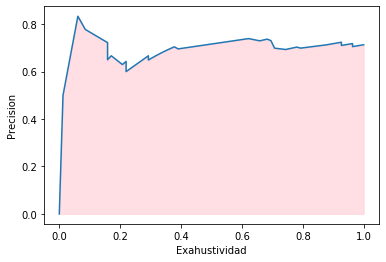

In [69]:
#graficamos la curva precision-exahustividad
plt.plot(rvpsNuevo,precisionNuevo)
plt.fill_between(rvpsNuevo,precisionNuevo, 0, alpha=0.5, color = 'pink')
plt.xlabel('Exahustividad')
plt.ylabel('Precision')
plt.show()

In [70]:
#calculamos el area bajo la curva precision exahustividad
aucroc(rvpsNuevo,precisionNuevo)

0.6979507957994917

Para este caso, tambien el área bajo la curva precision exahustividad disminuyó al rededor de 0.15 unidades. De aqui tambien vemos que este modelo es peor que el de la regresion logistica.

Concluimos que el error tanto la prediccion del modelo juegan un papel importante con respecto al comportamiento del modelo (curva ROC y precision exahustividad). Y el acurracy score no es una medida determinante de la calidad general de un modelo.